In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools as it
from MetricMethod import *
from phik import phik_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
df['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

In [4]:
for coulumn in it.filterfalse(lambda x: x in 
                            set(['customer_id', 'country', 'gender', 'churn', 'products_number']),
                            it.islice(df.columns, 0, None)):
    mean = df[coulumn].mean()
    std = df[coulumn].std()

    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std

    ind = (df[coulumn] < lower_limit) | (df[coulumn] > upper_limit)
    out = df[ind][['customer_id', coulumn]]
    if len(out) > 0:
        print(lower_limit, upper_limit)
        print(out)


360.568903791609 940.488696208391
      customer_id  credit_score
1405     15612494           359
1631     15685372           350
1838     15758813           350
1962     15692416           358
2473     15679249           351
8723     15803202           350
8762     15765173           350
9624     15668309           350
7.458380644886169 70.38521935511383
      customer_id  age
85       15805254   75
158      15589975   73
230      15808473   72
252      15793726   79
310      15712287   80
...           ...  ...
9646     15603111   71
9671     15636061   78
9736     15644103   78
9894     15704795   77
9936     15653037   77

[133 rows x 2 columns]


<AxesSubplot: >

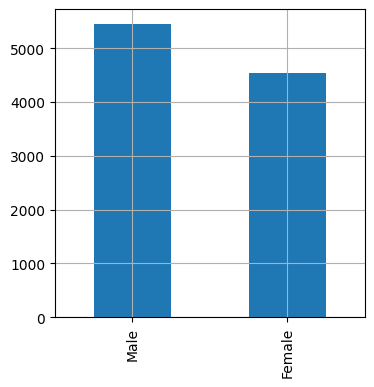

In [5]:
df['gender'].value_counts().plot.bar(grid=True, figsize=(4, 4))

<AxesSubplot: >

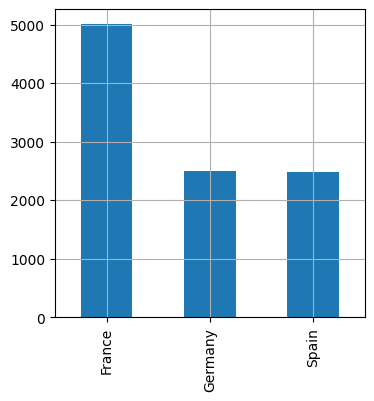

In [6]:
df['country'].value_counts().plot.bar(grid=True, figsize=(4, 4))

<AxesSubplot: xlabel='gender', ylabel='count'>

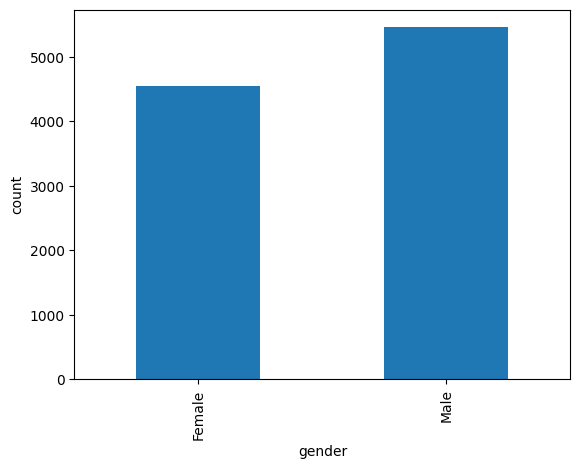

In [7]:
df.groupby('gender')['churn'].count().plot.bar(ylabel='count')

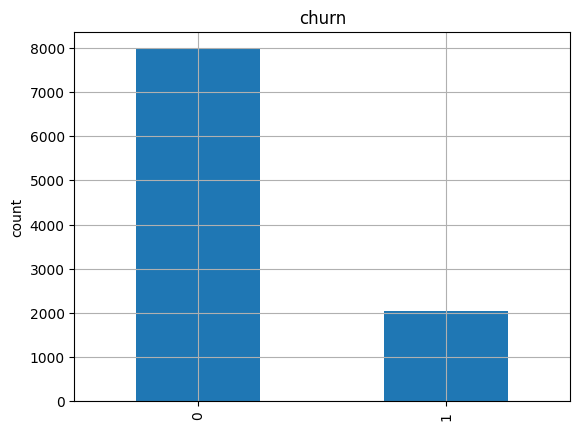

In [8]:
df['churn'].value_counts().plot.bar(grid=True).set_title("churn")
plt.ylabel("count")
plt.show()

array([[<AxesSubplot: title={'center': 'credit_score'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'tenure'}>],
       [<AxesSubplot: title={'center': 'balance'}>,
        <AxesSubplot: title={'center': 'products_number'}>,
        <AxesSubplot: title={'center': 'credit_card'}>],
       [<AxesSubplot: title={'center': 'active_member'}>,
        <AxesSubplot: title={'center': 'estimated_salary'}>,
        <AxesSubplot: title={'center': 'churn'}>]], dtype=object)

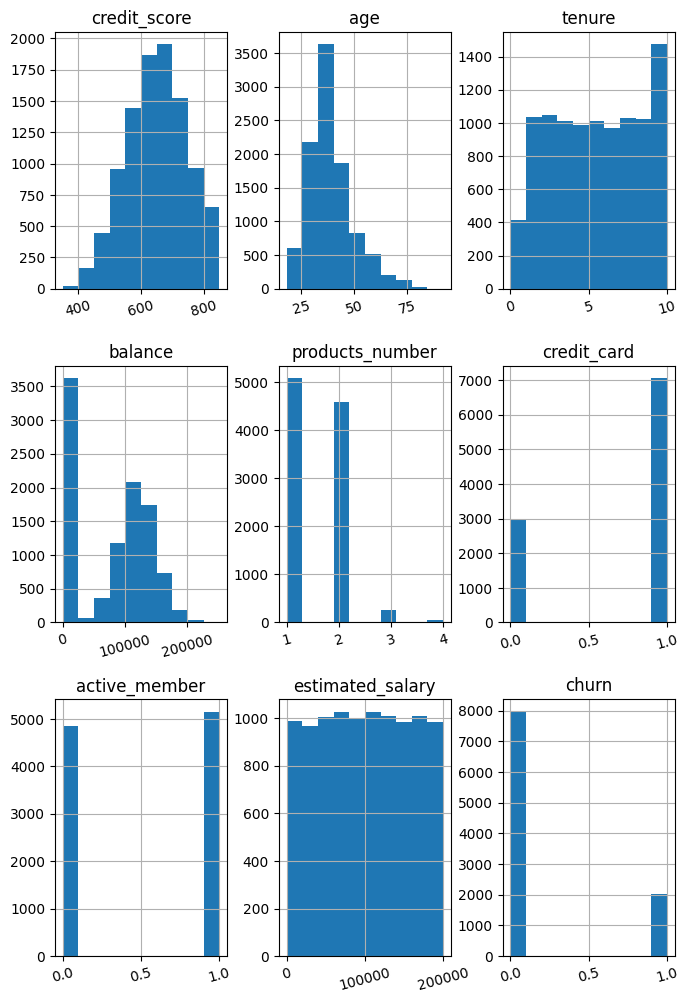

In [9]:
t = df.drop(columns=['customer_id', ])
t.hist(figsize=(8, 12), xrot=15)


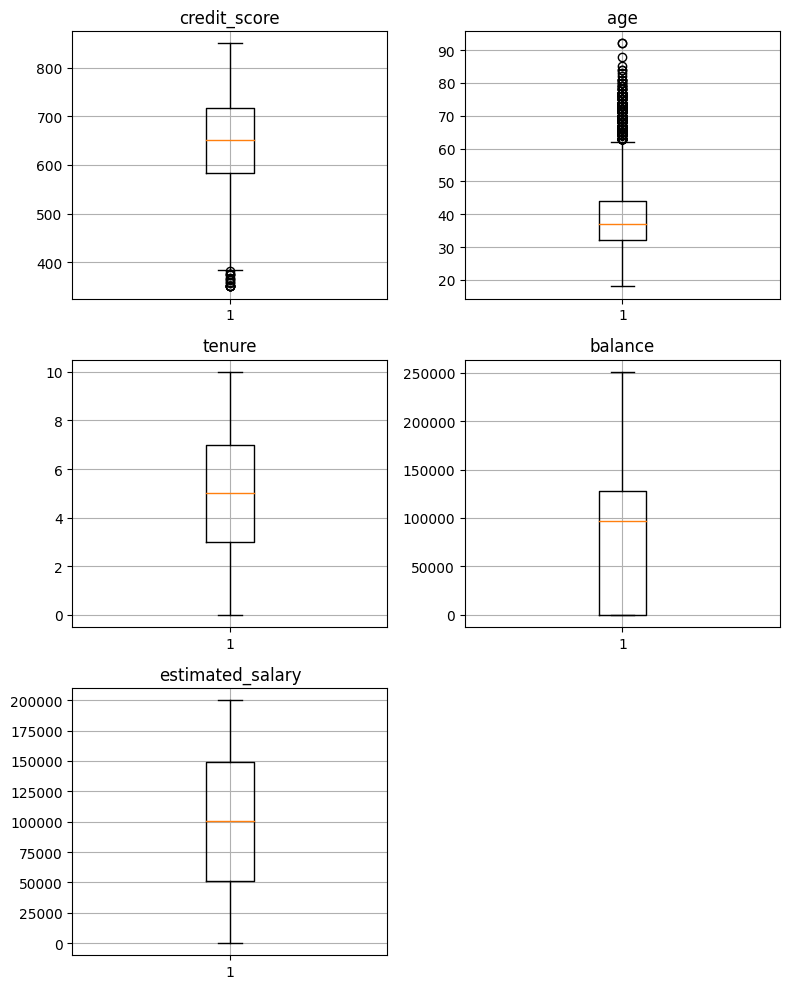

In [10]:
t = df.drop(columns=['customer_id', 'active_member', 'country', 'gender',
                      'churn', 'products_number', 'credit_card'])

# Получение количества колонок
num_columns = len(t.columns)

# Расчет количества строк и столбцов для сетки
num_rows = int((num_columns + 1) / 2)  # Округляем вверх до ближайшего целого числа

# Создание сетки подграфиков
fig, axes = plt.subplots(num_rows, 2, figsize=(8, 10))

# Распаковка двумерного массива осей в одномерный массив
axes = axes.flatten()

# Построение ящиковых диаграмм для каждой колонки
for i, column in enumerate(t.columns):
    # Построение ящиковой диаграммы для текущей колонки
    axes[i].boxplot(t[column].astype(float))
    axes[i].grid(True)
    
    # Установка заголовка для текущего графика
    axes[i].set_title(column)

# Удаление пустых подграфиков
if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

# Расположение подграфиков
fig.tight_layout()

# Отображение графиков
plt.show()

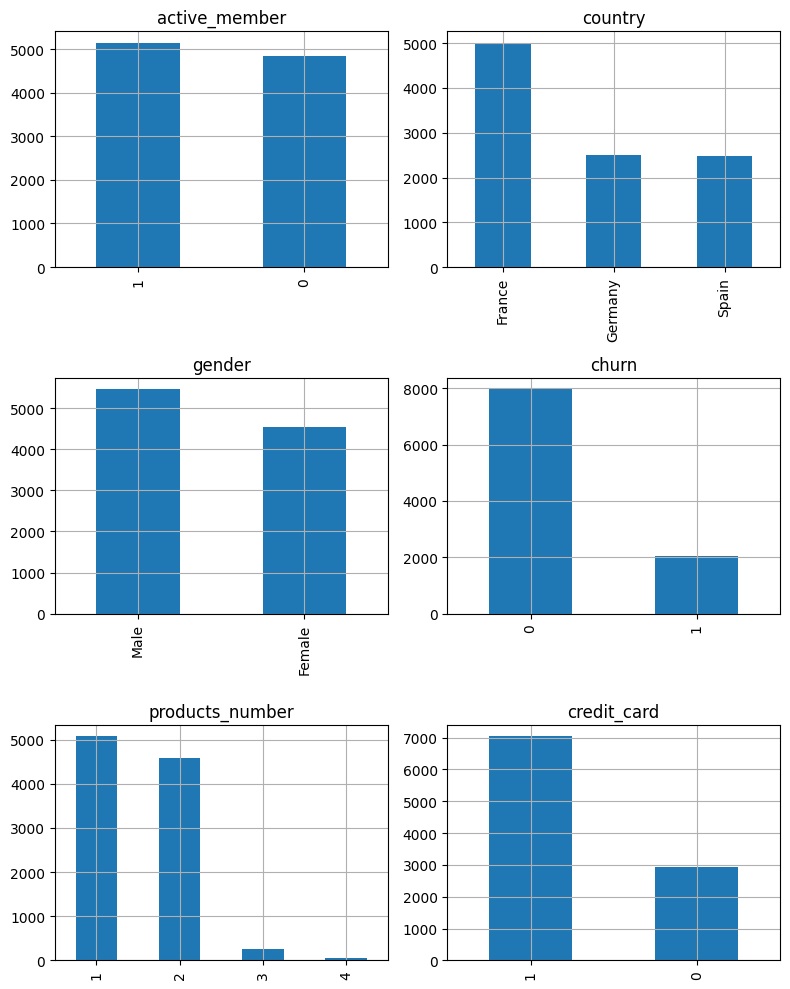

In [11]:
t = df[['active_member', 'country', 'gender',
                      'churn', 'products_number', 'credit_card']]

# Получение количества колонок
num_columns = len(t.columns)

# Расчет количества строк и столбцов для сетки
num_rows = int((num_columns + 1) / 2)  # Округляем вверх до ближайшего целого числа

# Создание сетки подграфиков
fig, axes = plt.subplots(num_rows, 2, figsize=(8, 10))

# Распаковка двумерного массива осей в одномерный массив
axes = axes.flatten()

# Построение ящиковых диаграмм для каждой колонки
for i, column in enumerate(t.columns):
    # Построение ящиковой диаграммы для текущей колонки
    #axes[i].plot(t[column], kind='bar')
    t[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].grid(True)
    
    # Установка заголовка для текущего графика
    axes[i].set_title(column)

# Удаление пустых подграфиков
if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

# Расположение подграфиков
fig.tight_layout()

# Отображение графиков
plt.show()

In [12]:
df.corr().round(4)

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_13604\231232809.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(4)


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.0000,0.0053,0.0095,-0.0149,-0.0124,0.0170,-0.0140,0.0017,0.0153,-0.0062
credit_score,0.0053,1.0000,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0271
age,0.0095,-0.0040,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853
tenure,-0.0149,0.0008,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0140
balance,-0.0124,0.0063,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1185
products_number,0.0170,0.0122,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0478
credit_card,-0.0140,-0.0055,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0071
active_member,0.0017,0.0257,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1561
estimated_salary,0.0153,-0.0014,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0121
churn,-0.0062,-0.0271,0.2853,-0.0140,0.1185,-0.0478,-0.0071,-0.1561,0.0121,1.0000


In [13]:
phik_matrix(df)

interval columns not set, guessing: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.018946,0.000000,0.000000,0.042049,0.000000,0.000000,0.009637,0.000000,0.014253,0.000000,0.029595
credit_score,0.018946,1.000000,0.035375,0.000000,0.000000,0.000000,0.000000,0.034645,0.000000,0.038064,0.034215,0.096525
country,0.000000,0.035375,1.000000,0.013354,0.085025,0.012422,0.463811,0.049418,0.002919,0.010947,0.028372,0.104511
gender,0.000000,0.000000,0.013354,1.000000,0.033815,0.035587,0.000000,0.063174,0.000000,0.031384,0.028019,0.165422
age,0.042049,0.000000,0.085025,0.033815,1.000000,0.036659,0.035357,0.145566,0.016433,0.187434,0.051545,0.487524
tenure,0.000000,0.000000,0.012422,0.035587,0.036659,1.000000,0.052296,0.059077,0.033684,0.024381,0.000000,0.022895
balance,0.000000,0.000000,0.463811,0.000000,0.035357,0.052296,1.000000,0.371385,0.050671,0.018236,0.000000,0.183365
products_number,0.009637,0.034645,0.049418,0.063174,0.145566,0.059077,0.371385,1.000000,0.000000,0.056918,0.031562,0.565084
credit_card,0.000000,0.000000,0.002919,0.000000,0.016433,0.033684,0.050671,0.000000,1.000000,0.009377,0.000000,0.000000
active_member,0.014253,0.038064,0.010947,0.031384,0.187434,0.024381,0.018236,0.056918,0.009377,1.000000,0.032847,0.241939


<AxesSubplot: xlabel='country', ylabel='estimated_salary'>

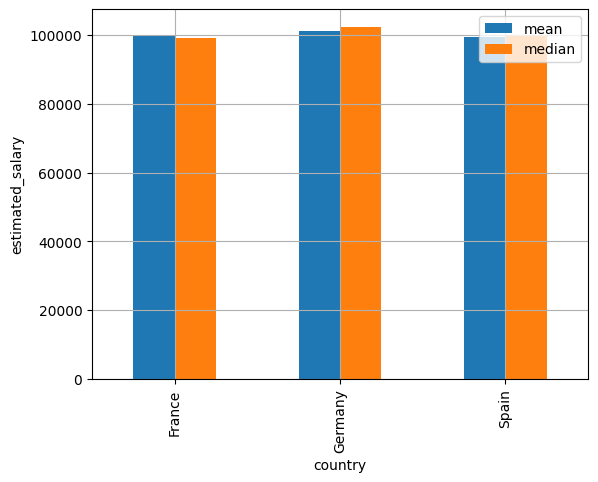

In [14]:
df.groupby('country')['estimated_salary'].agg(['mean', 'median']).plot.bar(ylabel='estimated_salary', grid = True)

<AxesSubplot: title={'center': 'estimated_salary'}, xlabel='country'>

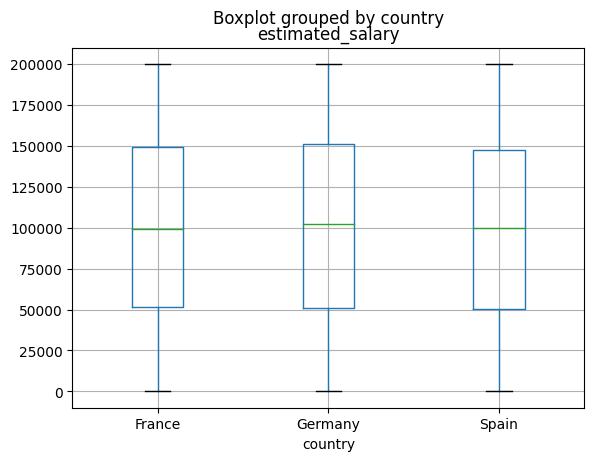

In [15]:
df.boxplot(column='estimated_salary', by='country', grid=True)

    


<AxesSubplot: title={'center': 'balance'}, xlabel='group_age'>

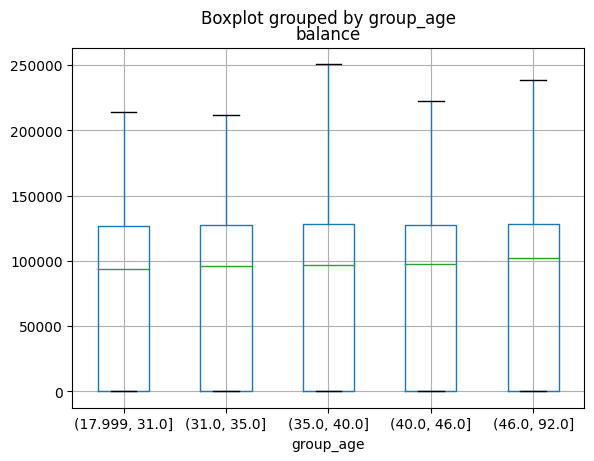

In [16]:
t = df.copy()
t['group_age'] = pd.qcut(t['age'], 5)
t.boxplot(column='balance', by='group_age')

array([[<AxesSubplot: title={'center': '(17.999, 31.0]'}>,
        <AxesSubplot: title={'center': '(31.0, 35.0]'}>],
       [<AxesSubplot: title={'center': '(35.0, 40.0]'}>,
        <AxesSubplot: title={'center': '(40.0, 46.0]'}>],
       [<AxesSubplot: title={'center': '(46.0, 92.0]'}>, <AxesSubplot: >]],
      dtype=object)

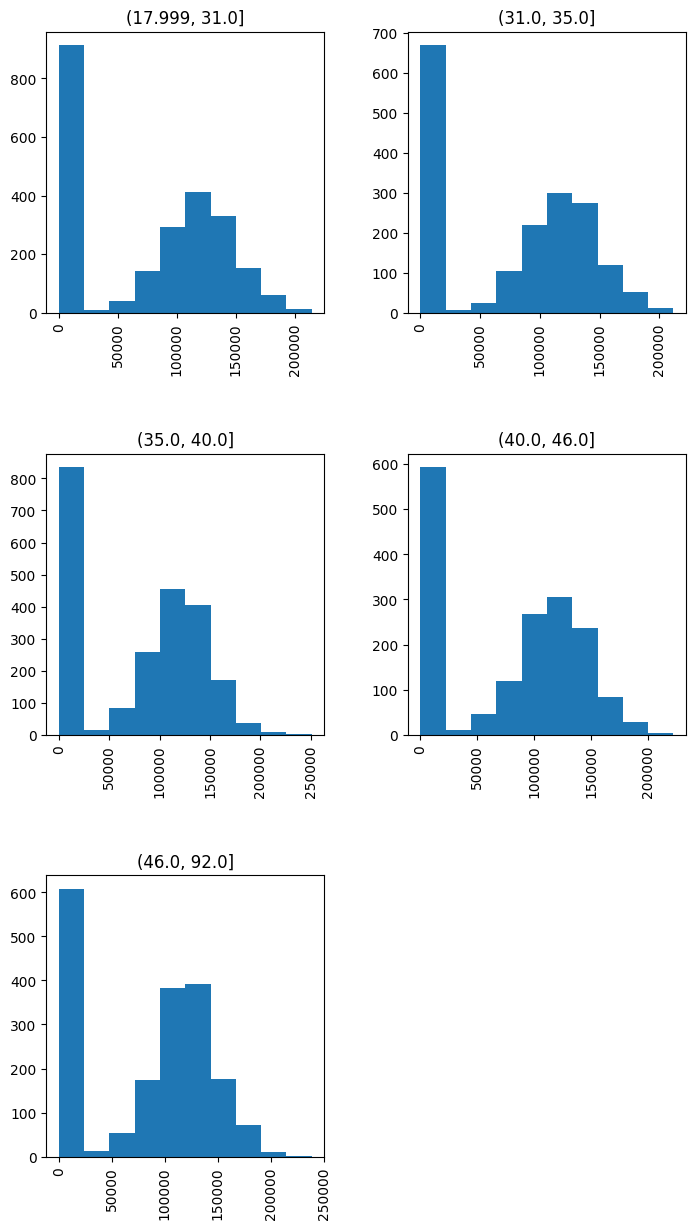

In [17]:
t.hist(column='balance', by='group_age', figsize=(8, 15))

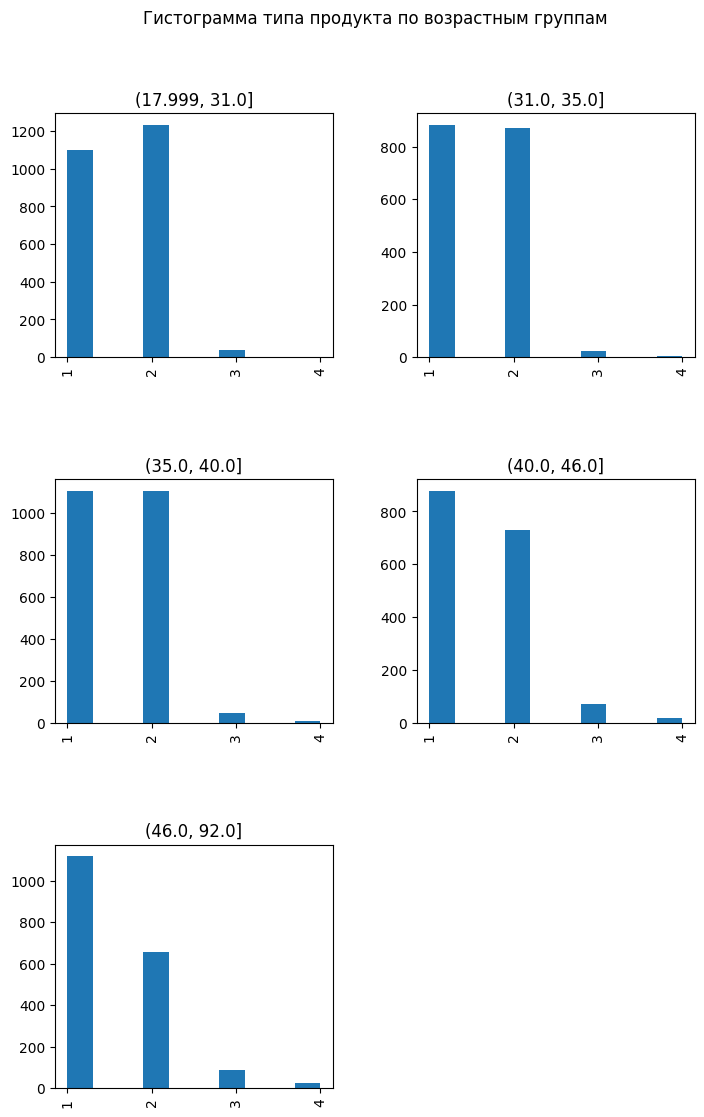

In [18]:
t.hist(column='products_number', by='group_age', figsize=(8, 13))

# Настройка внешнего вида графика и добавление названия
plt.suptitle('Гистограмма типа продукта по возрастным группам')

# Показываем график
plt.show()

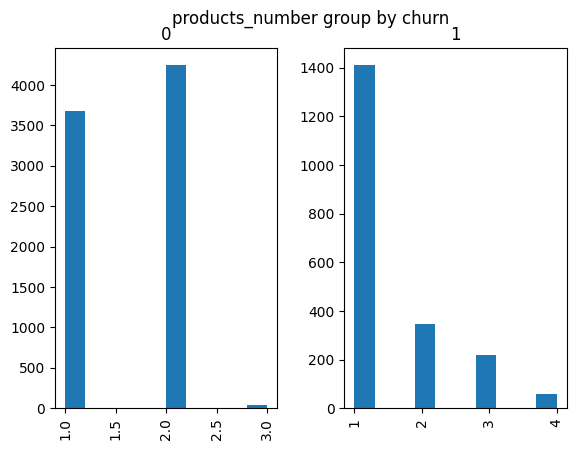

In [19]:
t.hist(column='products_number', by='churn')

# Настройка внешнего вида графика и добавление названия
plt.suptitle('products_number group by churn')

# Показываем график
plt.show()

<AxesSubplot: xlabel='credit_card', ylabel='count'>

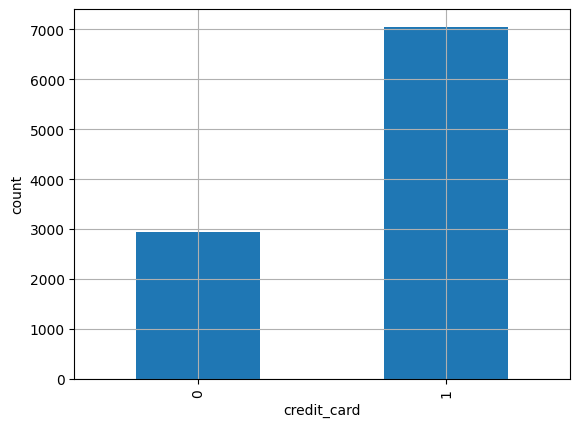

In [20]:
df.groupby('credit_card')['credit_card'].count().plot.bar(grid=True, ylabel='count')

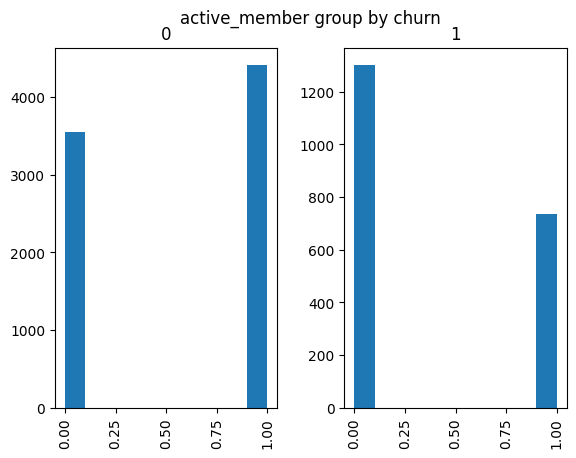

In [21]:
t.hist(column='active_member', by='churn')
# Настройка внешнего вида графика и добавление названия
plt.suptitle('active_member group by churn')

# Показываем график
plt.show()

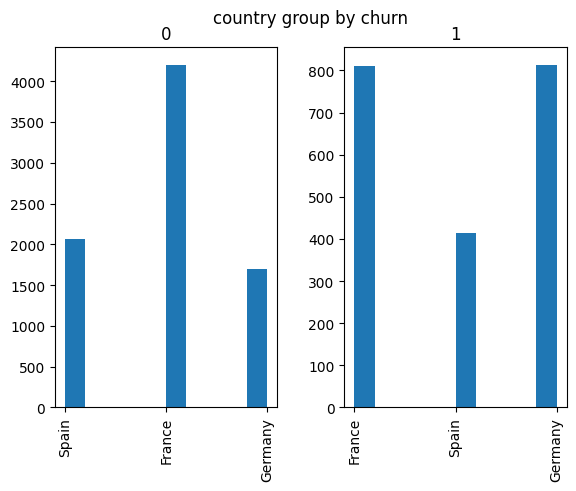

In [22]:
t.hist(column='country', by='churn')
# Настройка внешнего вида графика и добавление названия
plt.suptitle('country group by churn')

# Показываем график
plt.show()

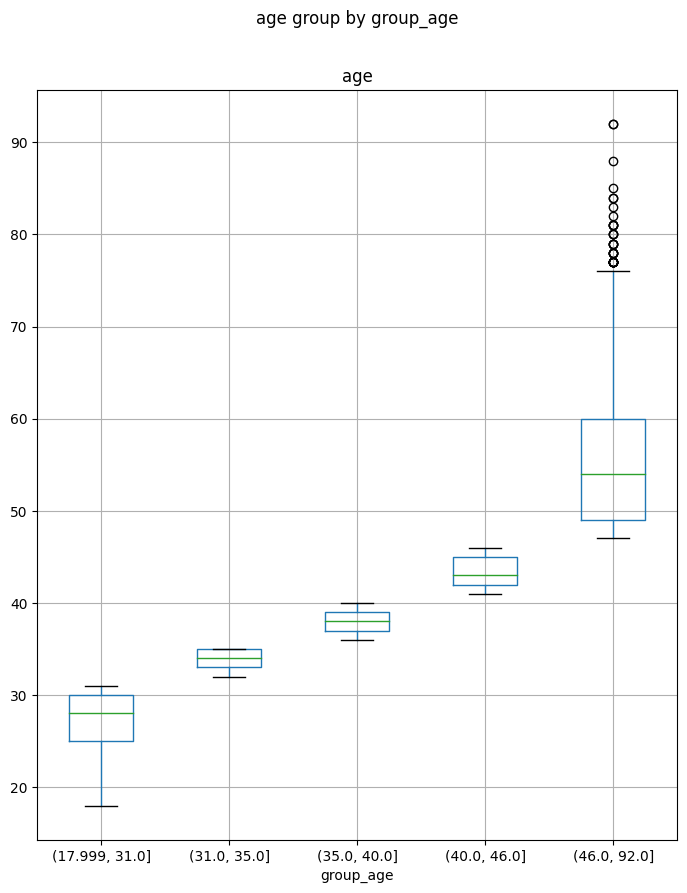

In [23]:
t.boxplot(column='age', by='group_age', figsize=(8, 10))

plt.suptitle('age group by group_age')

# Показываем график
plt.show()

In [24]:
df_processed = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)
df_processed = df_processed.drop(columns='customer_id')
df_processed

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [25]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

names = df_processed.columns
d = scaler.fit_transform(df_processed)

df_processed = pd.DataFrame(d, columns=names)
df_processed.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,0.0


In [26]:
# Разделите датафрейм на тренировочный и остаточный набор данных
train_df, temp_df = train_test_split(df_processed, test_size=0.3, random_state=42)

train_X = train_df.drop(columns='churn')
train_y = train_df['churn']

# Разделите остаточный набор данных на валидационный и тестовый наборы данных
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

val_X = val_df.drop(columns='churn')
val_y = val_df['churn']

test_X = test_df.drop(columns='churn')
test_y = test_df['churn']

# Выведите размеры полученных наборов данных
print("Размер тренировочного набора данных:", train_df.shape)
print("Размер валидационного набора данных:", val_df.shape)
print("Размер тестового набора данных:", test_df.shape)

Размер тренировочного набора данных: (7000, 12)
Размер валидационного набора данных: (1500, 12)
Размер тестового набора данных: (1500, 12)


In [27]:
train_X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
9069,0.538,0.189189,0.4,0.699113,0.333333,1.0,1.0,0.863987,0.0,1.0,0.0
2603,0.586,0.216216,0.7,0.639407,0.000000,0.0,1.0,0.942698,1.0,0.0,0.0
7738,0.422,0.202703,0.6,0.000000,0.333333,0.0,0.0,0.868427,0.0,0.0,1.0
1579,0.536,0.310811,0.8,0.150271,0.000000,1.0,1.0,0.978913,1.0,0.0,1.0
5058,0.728,0.256757,0.9,0.591742,0.333333,0.0,1.0,0.756419,0.0,0.0,1.0


In [28]:
k = 3
model = KNeighborsClassifier(n_neighbors=k, weights='distance')
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print(f'Accuracy {accuracy_score(test_y, pred_y)}')
print(f'F1 {f1_score(test_y, pred_y)}')
print(f'Precision {precision_score(test_y, pred_y)}')
print(f'Recall {recall_score(test_y, pred_y)}')

Accuracy 0.8106666666666666
F1 0.4342629482071714
Precision 0.5396039603960396
Recall 0.36333333333333334


In [29]:
k = 1
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print(f'Accuracy {accuracy_score(test_y, pred_y)}')
print(f'F1 {f1_score(test_y, pred_y)}')
print(f'Precision {precision_score(test_y, pred_y)}')
print(f'Recall {recall_score(test_y, pred_y)}')

Accuracy 0.796
F1 0.4778156996587031
Precision 0.48951048951048953
Recall 0.4666666666666667


In [30]:
smote = SMOTE()
train_X_sm, train_y_sm = smote.fit_resample(train_X, train_y)

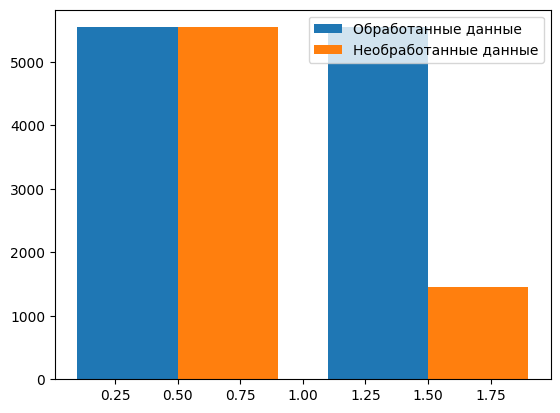

In [46]:
fig, ax = plt.subplots()
ax.hist([train_y_sm, train_y], bins=[0, 1, 2], label=['Обработанные данные', 'Необработанные данные'])

ax.legend()
plt.show()

In [31]:
k = 1
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {round(accuracy_score(test_y, pred_y), 4)}')
print(f'F1 {round(f1_score(test_y, pred_y), 4)}')
print(f'Precision {round(precision_score(test_y, pred_y), 4)}')
print(f'Recall {round(recall_score(test_y, pred_y), 4)}')

Accuracy 0.768
F1 0.4743
Precision 0.4337
Recall 0.5233


In [32]:
model = KNN(countNeigbor=1)
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {round(accuracy_score(test_y, pred_y), 4)}')
print(f'F1 {round(f1_score(test_y, pred_y), 4)}')
print(f'Precision {round(precision_score(test_y, pred_y), 4)}')
print(f'Recall {round(recall_score(test_y, pred_y), 4)}')

Accuracy 0.768
F1 0.4743
Precision 0.4337
Recall 0.5233


In [33]:
model = KNN_weight(countNeigbor=1)
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {round(accuracy_score(test_y, pred_y), 4)}')
print(f'F1 {round(f1_score(test_y, pred_y), 4)}')
print(f'Precision {round(precision_score(test_y, pred_y), 4)}')
print(f'Recall {round(recall_score(test_y, pred_y), 4)}')

Accuracy 0.768
F1 0.4743
Precision 0.4337
Recall 0.5233


In [34]:
model = ParzenWindowVariableWidth(countNeighbor=3)
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {round(accuracy_score(test_y, pred_y), 4)}')
print(f'F1 {round(f1_score(test_y, pred_y), 4)}')
print(f'Precision {round(precision_score(test_y, pred_y), 4)}')
print(f'Recall {round(recall_score(test_y, pred_y), 4)}')

Accuracy 0.7413
F1 0.4441
Precision 0.3894
Recall 0.5167


In [35]:
model = ParzenWindowFixedWidth(width=0.4)
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {round(accuracy_score(test_y, pred_y), 4)}')
print(f'F1 {round(f1_score(test_y, pred_y), 4)}')
print(f'Precision {round(precision_score(test_y, pred_y), 4)}')
print(f'Recall {round(recall_score(test_y, pred_y), 4)}')

Accuracy 0.716
F1 0.4688
Precision 0.3745
Recall 0.6267


In [36]:
model = PotentialFunction(width=0.4, eps=0.5, method='kdtree')
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {round(accuracy_score(test_y, pred_y), 4)}')
print(f'F1 {round(f1_score(test_y, pred_y), 4)}')
print(f'Precision {round(precision_score(test_y, pred_y), 4)}')
print(f'Recall {round(recall_score(test_y, pred_y), 4)}')

Accuracy 0.8
F1 0.0
Precision 0.0
Recall 0.0


d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
y_pred = np.array([0 for i in range(len(test_y))])
accuracy_score(test_y, pred_y)

0.8